 # Visualizing Rolling Statistics with Pandas DataFrames


    ** Now we can look a  window of time smaller than 10 years. When you develop automated trading strategis you look at a shorter window times, (1 week or less)

    ** Pandas `rolling()` method allow us to do this. It returns a Series and any method available to a Series is callable on the output of rolling().
    
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

 ## 1. Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline


 ## 2. Create a Path to the File Using Pathlib.

In [2]:
# Read the aapl data, set the `date` as the index
aapl_csv_path = Path("../Resources/aapl.csv")



 ## 3. Read the CSV into a Pandas DataFrame.

In [3]:
# Read the aapl CSV into a DataFrame while formatting and setting the `date` column as the index
aapl_df = pd.read_csv(aapl_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,close,volume,open,high,low
date,,,,,
2009-08-03,23.7757,98285279,23.6014,23.8057,23.5529
2009-08-04,23.6500,98772690,23.5614,23.6529,23.4586
2009-08-05,23.5871,105581942,23.6786,23.9128,23.4586
2009-08-06,23.4157,85271156,23.6543,23.7871,23.2986
2009-08-07,23.6443,96727219,23.6414,23.8000,23.5429


 ## 4. Drop Extra Columns

In [4]:
# Use the `drop` function to drop the extra columns
aapl_df.drop(columns=["volume", "open", "high", "low"], inplace=True)

In [5]:
aapl_df

,close
date,
2009-08-03,23.7757
2009-08-04,23.6500
2009-08-05,23.5871
2009-08-06,23.4157
2009-08-07,23.6443
...,...
2019-07-26,207.7400
2019-07-29,209.6800
2019-07-30,208.7800


 ## 6. Rolling 7-Day Mean of AAPL Closing Prices

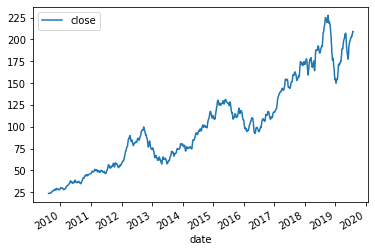

In [7]:
# Plot a rolling 7-day mean of aapl's closing prices
aapl_df.rolling(window=7).mean().plot()

In [8]:
# Show the dataframe the first 7 NAN values
aapl_df.rolling(window=7).mean()

,close
date,
2009-08-03,NaN
2009-08-04,NaN
2009-08-05,NaN
2009-08-06,NaN
2009-08-07,NaN
...,...
2019-07-26,206.820000
2019-07-29,207.394286
2019-07-30,208.278571


 ## 8. Rolling 30-Day Mean and Standard Deviation of AAPL Closing Prices

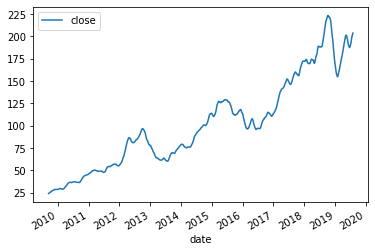

In [9]:
# Plot a rolling 30-day mean of aapl's closing prices

aapl_df.rolling(window=30).mean().plot()

 ## 9. Rolling 30-Day Standard Deviation of AAPL Closing Prices

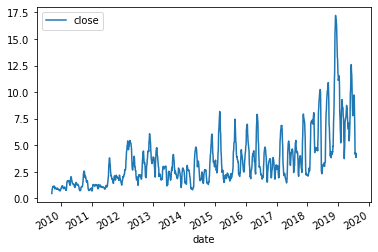

In [12]:
# Plot a rolling 30-day std dev of aapl's closing prices
aapl_df.rolling(window=30).std().plot()

 ## 12. Overlay Daily Closing Price and 30-Day Rolling Mean of AAPL

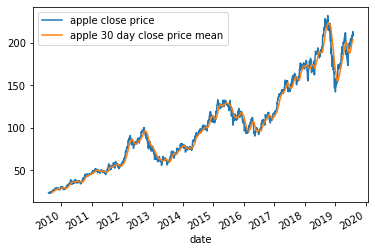

In [14]:
# Set figure of the daily closing prices of aapl
ax = aapl_df.plot()



# Plot 30-Day Rolling Mean on the same figure
aapl_df.rolling(window=30).mean().plot(ax=ax)

# Set the legend of the figure

ax.legend(["apple close price", "apple 30 day close price mean"])

 ## 13. Calculate the Volume Weighted Average Price (VWAP)

 ![VWAP](https://dm2302files.storage.live.com/y4mtQFl9sETd4GX3h3HcGrgEZCgrGAOtLlWbjBRVd8PL2CHqyUO6HJbccBVly2M0IT2TKXAtLkSv5dYmgvfRsqTyqK5BK1XvS9qV_7hQG9NdaAwvdUTAxUMbeWAGQ8ozwnPN0Q8elE2XD6AqtnVIpNG4zw0wATtJxedbNRKDudXz1qzoPgWc5vSuW5NXE2WVWyH?width=240&height=60&cropmode=none)

1. Calculate the avg price of the stock over a t-period. (1 day, 5 minutes, etc) and multiply by the volume for that period
2. Divide the result by the volume of that period

### Why VWAP?

** Trend confirmation (not a buy or sell execution). Indicate if market is bearish or bullish. Market is bullish when price < VWAP (short position) and bearish if price > VWAP (long position). 

- Bull Market - On the rise - Traders believe stock or overall market will go higher
- Bear Market - Decline - Traders believe stock or overall market will go down or underperform.  

** Use as a indicator when to buy or sell .

 

 

In [15]:
# Read the aapl CSV into a DataFrame while formatting and setting the `date` column as the index
aapl_df = pd.read_csv(aapl_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

# Calculate daily average
aapl_df['avg_price'] = aapl_df[['open','close','high','low']].mean(axis=1)
aapl_df.head()

,close,volume,open,high,low,avg_price
date,,,,,,
2009-08-03,23.7757,98285279,23.6014,23.8057,23.5529,23.683925
2009-08-04,23.6500,98772690,23.5614,23.6529,23.4586,23.580725
2009-08-05,23.5871,105581942,23.6786,23.9128,23.4586,23.659275
2009-08-06,23.4157,85271156,23.6543,23.7871,23.2986,23.538925
2009-08-07,23.6443,96727219,23.6414,23.8000,23.5429,23.657150


In [19]:
# Function for calculating volume weighted average price
def volume_weighted_average_price(avg_price, volume, avg_volume):
    return avg_price*volume/avg_volume

In [20]:
# Calculate average volume for each window = 10
aapl_df["avg_volume"] = aapl_df["volume"].rolling(window=10).mean()
aapl_df


,close,volume,open,high,low,avg_price,avg_volume
date,,,,,,,
2009-08-14,23.8257,76389693,23.9914,24.0324,23.6471,23.874150,NaN
2009-08-17,22.7986,130749329,23.3643,23.3700,22.7743,23.076800,NaN
2009-08-18,23.4286,106128642,23.0900,23.4629,23.0586,23.260025,NaN
2009-08-19,23.5143,103001321,23.2500,23.6143,23.2071,23.396425,NaN
2009-08-20,23.7614,85380706,23.5686,23.8171,23.5157,23.665700,NaN
...,...,...,...,...,...,...,...
2019-07-26,207.7400,17618870,207.4800,209.7300,207.1400,208.022500,17458630.0
2019-07-29,209.6800,21673390,208.4600,210.6400,208.4400,209.305000,17931227.0
2019-07-30,208.7800,33935720,208.7600,210.1600,207.3100,208.752500,19638117.0


In [21]:
# Drop n/a values for first points where the window was undefined
aapl_df.dropna(inplace=True)
aapl_df.head()

,close,volume,open,high,low,avg_price,avg_volume
date,,,,,,,
2009-08-27,24.2071,111932414,24.1071,24.2243,23.5471,24.021400,97563292.3
2009-08-28,24.2928,113355444,24.6100,24.6414,24.0757,24.404975,101259867.4
2009-08-31,24.0300,77698483,24.0228,24.1214,23.7857,23.989975,95954782.8
2009-09-01,23.6140,117083715,23.9986,24.2857,23.5629,23.865300,97050290.1
2009-09-02,23.5971,90989317,23.5171,23.9443,23.4443,23.625700,95849089.7


In [24]:
# Let use lambda to apply functions that have multiple parameters. Apply the volume weighted average price function for each row in the dataframe
aapl_df['avg_price_vol'] = aapl_df.apply(lambda x : volume_weighted_average_price(x.avg_price, x.volume, x.avg_volume), axis=1) 

In [25]:
aapl_df

,close,volume,open,high,low,avg_price,avg_volume,avg_price_vol
date,,,,,,,,
2009-08-27,24.2071,111932414,24.1071,24.2243,23.5471,24.021400,97563292.3,27.559272
2009-08-28,24.2928,113355444,24.6100,24.6414,24.0757,24.404975,101259867.4,27.320170
2009-08-31,24.0300,77698483,24.0228,24.1214,23.7857,23.989975,95954782.8,19.425657
2009-09-01,23.6140,117083715,23.9986,24.2857,23.5629,23.865300,97050290.1,28.791650
2009-09-02,23.5971,90989317,23.5171,23.9443,23.4443,23.625700,95849089.7,22.427822
...,...,...,...,...,...,...,...,...
2019-07-26,207.7400,17618870,207.4800,209.7300,207.1400,208.022500,17458630.0,209.931786
2019-07-29,209.6800,21673390,208.4600,210.6400,208.4400,209.305000,17931227.0,252.985972
2019-07-30,208.7800,33935720,208.7600,210.1600,207.3100,208.752500,19638117.0,360.735522


[Lambdas Documentation](https://book.pythontips.com/en/latest/lambdas.html)

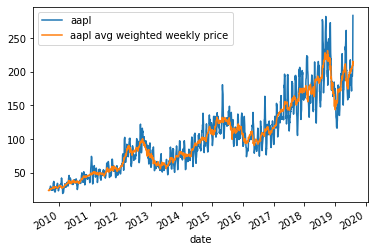

In [26]:
# Initialize plot with average weighted price
ax = aapl_df['avg_price_vol'].rolling(window=10).mean().plot()


# Add average price to the plot
aapl_df['avg_price'].plot(ax=ax)

# Set the legend of the figure
ax.legend(["aapl", "aapl avg weighted weekly price"])
